# Goal
* Plot Max, Average, Min in temperature of each year with bar chart.
* Findout which year have hightest temperature and in that year, which country have highest temperature.
* Findout which year have lowest temperature and in that year, which country have lowest temperature.
* Plot line chart in year 1995,2000,2005,2010,2015,2020.
* Compare Max, Average, Min temperature of each region and in coldest region and find top five lowest temperature country to help me decide which country to live.

# Data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('../input/temperature-of-all-countries-19952020/city_temperature.csv')


data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


There is NaN values, we need to findout how much it is.

In [3]:
data.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

Column State has a lot of null, drop it.

In [4]:
data=data.drop('State',axis=1)

Plot histogram to check outlier.

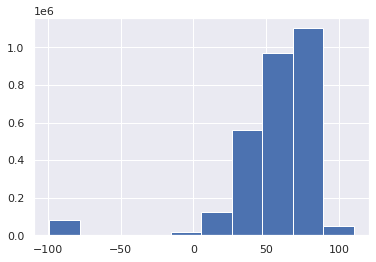

In [5]:
plt.hist(data['AvgTemperature']);

Outlier is at left, delete it.

In [6]:
outlier=data.loc[data['AvgTemperature']<-50,:]

outlier

,Region,Country,City,Month,Day,Year,AvgTemperature
220,Africa,Algeria,Algiers,8,9,1995,-99.0
221,Africa,Algeria,Algiers,8,10,1995,-99.0
408,Africa,Algeria,Algiers,2,13,1996,-99.0
409,Africa,Algeria,Algiers,2,14,1996,-99.0
1453,Africa,Algeria,Algiers,12,24,1998,-99.0
...,...,...,...,...,...,...,...
2905471,North America,US,San Juan Puerto Rico,3,29,2011,-99.0
2905534,North America,US,San Juan Puerto Rico,5,31,2011,-99.0
2905689,North America,US,San Juan Puerto Rico,11,2,2011,-99.0
2905726,North America,US,San Juan Puerto Rico,12,9,2011,-99.0


In [7]:
#drop
data=data.drop(outlier.index)

We want to set index type as datetime64 but before we do that, check day, month, year for strange values.

In [8]:
print(data['Day'].unique())
print(data['Month'].unique())
print(data['Year'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


So, no strange value.

Concatenate day, month, year and change its type to datetime64.

In [9]:
data['date']=data['Year'].astype(str)+'-'+data['Month'].astype(str)+'-'+data['Day'].astype(str)
data['date']=pd.to_datetime(data['date'])

Drop Day Month Year column and set date as index.

In [10]:
data.drop(['Day','Month','Year'],axis=1,inplace=True)
data=data.set_index('date')

data

,Region,Country,City,AvgTemperature
date,,,,
1995-01-01,Africa,Algeria,Algiers,64.2
1995-01-02,Africa,Algeria,Algiers,49.4
1995-01-03,Africa,Algeria,Algiers,48.8
1995-01-04,Africa,Algeria,Algiers,46.4
1995-01-05,Africa,Algeria,Algiers,47.9
...,...,...,...,...
2013-07-27,North America,US,San Juan Puerto Rico,82.4
2013-07-28,North America,US,San Juan Puerto Rico,81.6
2013-07-29,North America,US,San Juan Puerto Rico,84.2


We will find max, average, min temperature of each year by resample, so we need dataframe which has only date and temperature.

In [11]:
temp_data=data['AvgTemperature']
temp_data

date
1995-01-01    64.2
1995-01-02    49.4
1995-01-03    48.8
1995-01-04    46.4
1995-01-05    47.9
              ... 
2013-07-27    82.4
2013-07-28    81.6
2013-07-29    84.2
2013-07-30    83.8
2013-07-31    83.6
Name: AvgTemperature, Length: 2826655, dtype: float64

Average temperature is very high. Is it even celsius? I will check with my birthplace country 'Thailand'.

In [12]:
data.loc[data.Country=='Thailand',:]

,Region,Country,City,AvgTemperature
date,,,,
1996-01-01,Asia,Thailand,Bangkok,70.1
1996-01-02,Asia,Thailand,Bangkok,72.0
1996-01-03,Asia,Thailand,Bangkok,73.7
1996-01-04,Asia,Thailand,Bangkok,73.7
1996-01-05,Asia,Thailand,Bangkok,74.8
...,...,...,...,...
2011-10-25,Asia,Thailand,Bangkok,86.2
2011-10-26,Asia,Thailand,Bangkok,85.5
2011-10-27,Asia,Thailand,Bangkok,86.5


Ok that's very high temperature, my place only has temperature around 28-35 celsius, so this might be falenheit degree.

In [13]:
#Change to celsius degree
data['AvgTemperature']=((data['AvgTemperature']-32)*(5/9)).round(1)
temp_data=data['AvgTemperature']
print(temp_data)

date
1995-01-01    17.9
1995-01-02     9.7
1995-01-03     9.3
1995-01-04     8.0
1995-01-05     8.8
              ... 
2013-07-27    28.0
2013-07-28    27.6
2013-07-29    29.0
2013-07-30    28.8
2013-07-31    28.7
Name: AvgTemperature, Length: 2826655, dtype: float64


Create max, average, min teperature dataframe with resample.

In [14]:
max_temp_data=temp_data.resample('Y').max().round(1)
avg_temp_data=temp_data.resample('Y').mean().round(1)
min_temp_data=temp_data.resample('Y').min().round(1)

# Plot Max, Average, Min in temperature of each year with bar chart

Plot bar chart.

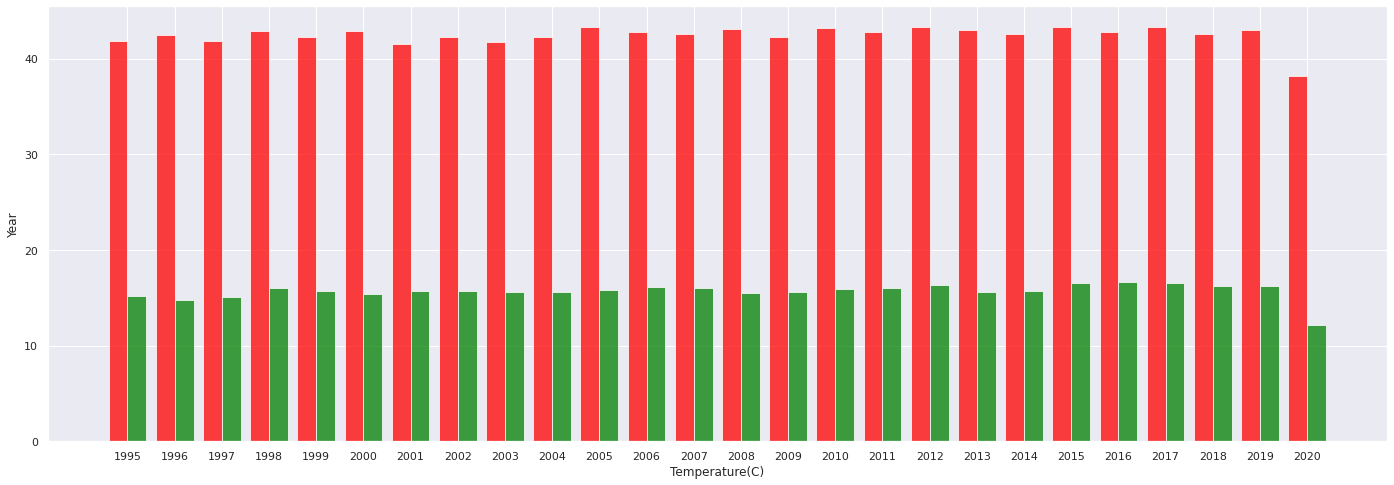

In [15]:
#I plot max and average temperature in same figure while min temperature in another figure since it only has minus sign
fig=plt.figure(figsize=(24,8))
plt.bar(np.arange(len(max_temp_data.index))-0.2,max_temp_data,color='red',width=0.4,alpha=0.75)
plt.bar(np.arange(len(max_temp_data.index))+0.2,avg_temp_data,color='green',width=0.4,alpha=0.75)
plt.xlabel('Temperature(C)')
plt.ylabel('Year')
plt.xticks(np.arange(len(max_temp_data.index)),np.arange(1995,2021));

We can see that max temperature bar trend is look similar to average temperature bar trend.

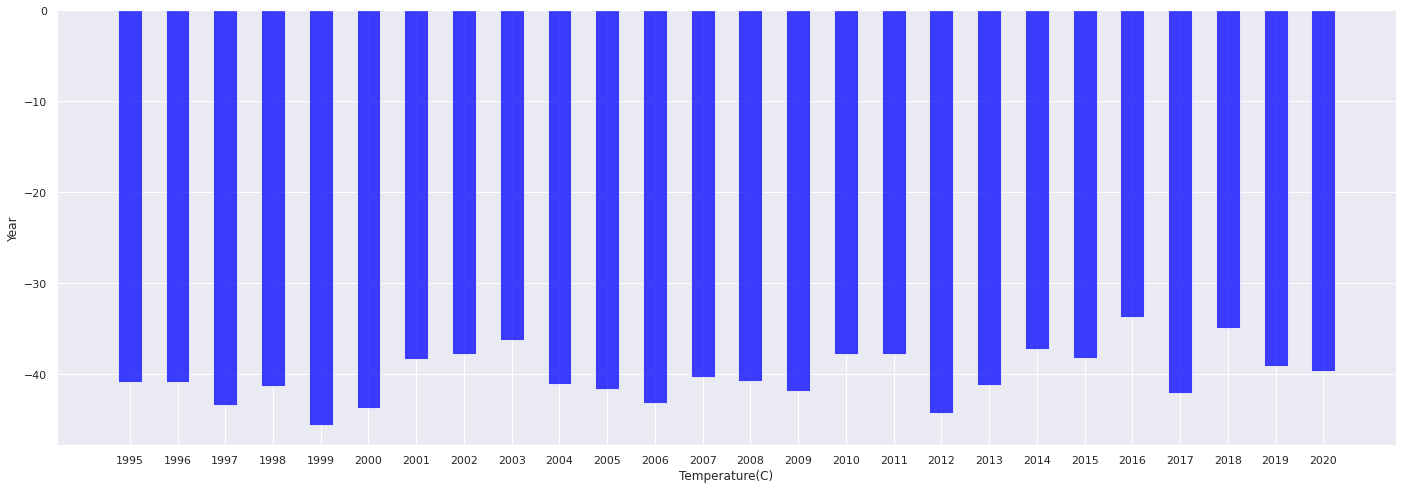

In [16]:
fig=plt.figure(figsize=(24,8))
plt.bar(np.arange(len(max_temp_data.index)),min_temp_data,color='blue',width=0.5,alpha=0.75)
plt.xlabel('Temperature(C)')
plt.ylabel('Year')
plt.xticks(np.arange(len(max_temp_data.index)),np.arange(1995,2021));

If we consider all figure, in first figure that's very hard to tell which year has highest temperature but for second figure, maybe year 1999 has lowest temperature?

In [17]:
#use pandas to find highest temperature and lowest temperature
print(max_temp_data[max_temp_data==max(max_temp_data)])
print(min_temp_data[min_temp_data==min(min_temp_data)])

date
2005-12-31    43.3
2012-12-31    43.3
2015-12-31    43.3
2017-12-31    43.3
Name: AvgTemperature, dtype: float64
date
1999-12-31   -45.6
Freq: A-DEC, Name: AvgTemperature, dtype: float64


There is 4 years with highest temperature consist of year 2005, year 2012, year2015 and year 2017.

For lowest temperature there is only one year, 1999


Next, we will find out which place in hottest in year 2005,2012,2015,2017 and which place in coldest in 1999

# Which place is hottest in hottest year? Which place in coldest in coldest year?

## Hottest

## 2005

In [18]:
hottest_2005=data.loc[(data.AvgTemperature==max(max_temp_data)) & (data.index.year==2005),:]
hottest_2005

,Region,Country,City,AvgTemperature
date,,,,
2005-07-17,Middle East,Kuwait,Kuwait,43.3


Ok, Kuwait and Middle East, not surprise because middle east has the desert, it could be hot.

## 2012

In [19]:
hottest_2012=data.loc[(data.AvgTemperature==max(max_temp_data)) & (data.index.year==2012),:]
hottest_2012

,Region,Country,City,AvgTemperature
date,,,,
2012-08-01,Middle East,Kuwait,Kuwait,43.3
2012-08-02,Middle East,Kuwait,Kuwait,43.3


Ok, same as last one.

## 2015

In [20]:
hottest_2015=data.loc[(data.AvgTemperature==max(max_temp_data)) & (data.index.year==2015),:]
hottest_2015

,Region,Country,City,AvgTemperature
date,,,,
2015-07-17,Middle East,Kuwait,Kuwait,43.3


Again!?

## 2017

In [21]:
hottest_2017=data.loc[(data.AvgTemperature==max(max_temp_data)) & (data.index.year==2017),:]
hottest_2017

,Region,Country,City,AvgTemperature
date,,,,
2017-06-29,Middle East,Kuwait,Kuwait,43.3


Ok, you got clown.

## Coldest

In [22]:
coldest=data.loc[data.AvgTemperature==min(min_temp_data),:]
coldest

,Region,Country,City,AvgTemperature
date,,,,
1999-12-31,North America,US,Fairbanks,-45.6


It's Fairbanksm US but I'm suprise why it's not antarctica.

In [23]:
data['Region'].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

Ok, this data don't have antarctica region.

# Plot line chart in year 1995,2000,2005,2010,2015,2020.

Create new dataframe with average temperature column and month as index.

In [24]:
data_1995=data.loc[data.index.year==1995,'AvgTemperature']
data_2000=data.loc[data.index.year==2000,'AvgTemperature']
data_2005=data.loc[data.index.year==2005,'AvgTemperature']
data_2010=data.loc[data.index.year==2010,'AvgTemperature']
data_2015=data.loc[data.index.year==2015,'AvgTemperature']
data_2020=data.loc[data.index.year==2020,'AvgTemperature']

Find average temperature.

In [25]:
data_1995=data_1995.resample('m').mean()
data_2000=data_2000.resample('m').mean()
data_2005=data_2005.resample('m').mean()
data_2010=data_2010.resample('m').mean()
data_2015=data_2015.resample('m').mean()
data_2020=data_2020.resample('m').mean()

Change index to 1 to 12.

In [26]:
data_1995.index=range(1,13)
data_2000.index=range(1,13)
data_2005.index=range(1,13)
data_2010.index=range(1,13)
data_2015.index=range(1,13)
#data_2020.index=range(1,13) #Length mismatch: Expected axis has 5 elements, new values have 12 elements

Oh, got error, check 2020

In [27]:
data_2020

date
2020-01-31     8.672634
2020-02-29     9.509090
2020-03-31    13.171929
2020-04-30    15.468913
2020-05-31    17.322829
Freq: M, Name: AvgTemperature, dtype: float64

Since this year's data contain only first 5 months, we won't use it anymore.

Make line plot

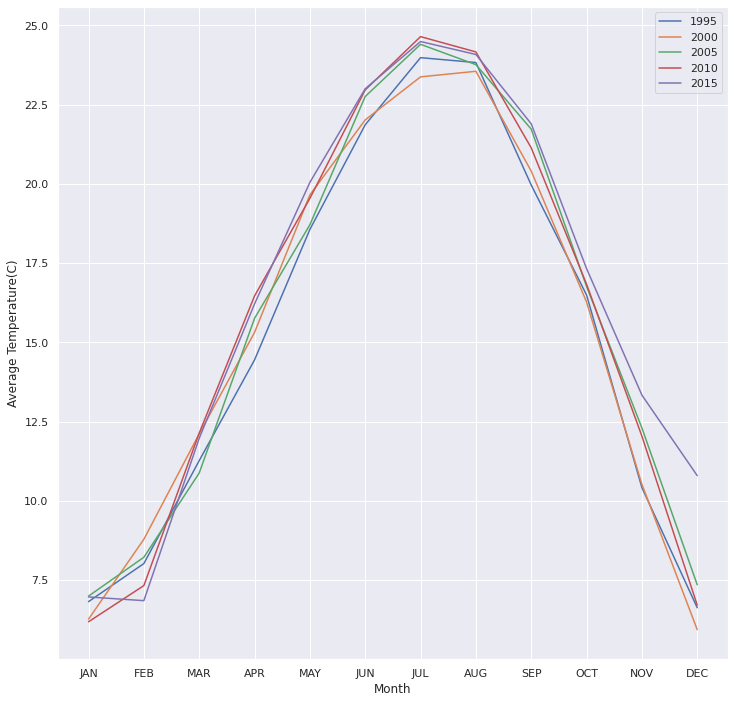

In [28]:
plt.figure(figsize=(12,12))
data_1995.plot(label=1995)
data_2000.plot(label=2000)
data_2005.plot(label=2005)
data_2010.plot(label=2010)
data_2015.plot(label=2015)
plt.xticks(range(1,13),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.xlabel('Month')
plt.ylabel('Average Temperature(C)')

plt.legend(loc='best')

From graph, we can see that July has highest temperature, the cause might come from summer season and we can see that January and December have lowest temperature since it's winter.


But compare temperature like this, isn't bar plot better?

## Bonus: Compare each month's average temperature with bar chart

Create new dataframe consist of average temperature and month columns. Set month as index column.

In [29]:
month_df=pd.DataFrame({'month':data.index.month,'AvgTemperature':data.AvgTemperature})
month_df=month_df.set_index('month')
month_df

,AvgTemperature
month,
1,17.9
1,9.7
1,9.3
1,8.0
1,8.8
...,...
7,28.0
7,27.6
7,29.0


Find average temperature of each month.

In [30]:
month_df=month_df.groupby('month').mean().round(1)
month_df

,AvgTemperature
month,
1,6.9
2,8.3
3,11.6
4,15.6
5,19.3
6,22.5
7,24.2
8,23.7
9,21.0


Make bar chart

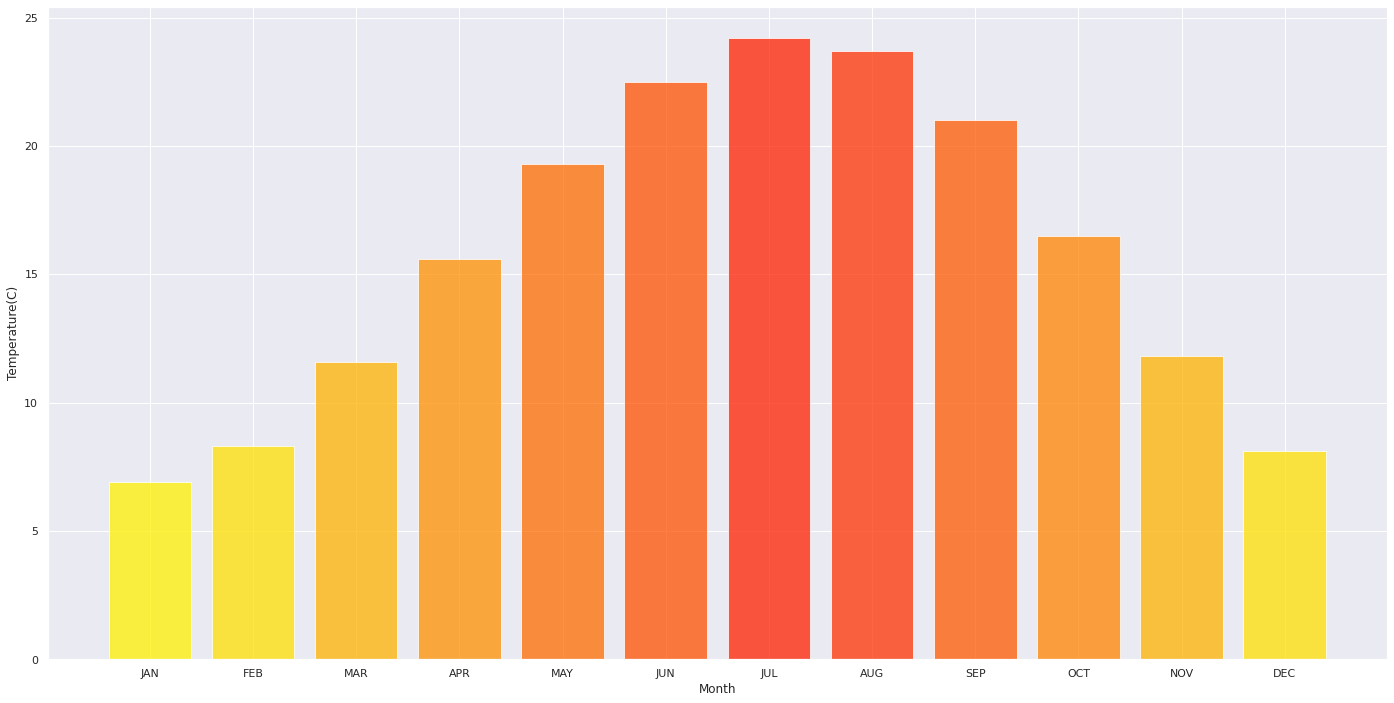

In [31]:
plt.figure(figsize=(24,12))
plt.bar(month_df.index,month_df.AvgTemperature,alpha=0.75,color=['#FFF000','#FFE000','#FFB200','#FF8F00','#FF6C00','#FF5100','#FF1F00','#FF3200','#FF5900','#FF8300','#FFB200','#FFE000'])
plt.ylabel('Temperature(C)')
plt.xlabel('Month')
plt.xticks(month_df.index,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']);

Wow, Look cool!!!

# Compare Max, Average, Min temperature of each region and in coldest region and find top five lowest temperature country.

Create new dataframe with Region and temperature columns from year 2015 to 2019.

In [32]:
Region=data.loc[data.index.year!=2020,['Region','AvgTemperature']]
Region

,Region,AvgTemperature
date,,
1995-01-01,Africa,17.9
1995-01-02,Africa,9.7
1995-01-03,Africa,9.3
1995-01-04,Africa,8.0
1995-01-05,Africa,8.8
...,...,...
2013-07-27,North America,28.0
2013-07-28,North America,27.6
2013-07-29,North America,29.0


Check index to make sure that year 2020 is not include.

In [33]:
Region.index.year.unique()

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019],
           dtype='int64', name='date')

Find average temperature of each region.

In [34]:
Region_avg=Region.groupby('Region').mean()
Region_avg

,AvgTemperature
Region,
Africa,23.550560
Asia,20.111659
Australia/South Pacific,16.787722
Europe,11.132653
Middle East,23.317760
North America,13.483352
South/Central America & Carribean,22.321552


Make bar chart

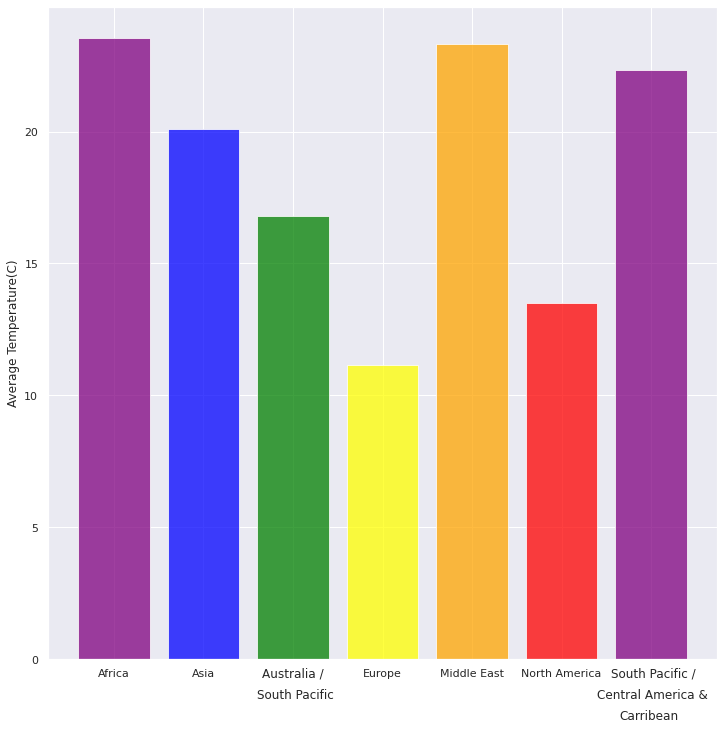

In [35]:
plt.figure(figsize=(12,12))
plt.bar(range(7),Region_avg['AvgTemperature'],color=['purple','blue','green','yellow','orange','red'],alpha=0.75);
plt.xticks(range(7),['Africa','Asia','','Europe','Middle East','North America','']);
plt.text(1.65,-0.7,'Australia /')
plt.text(1.6,-1.5,'South Pacific')
plt.text(5.55,-0.7,'South Pacific /')
plt.text(5.4,-1.5,'Central America &')
plt.text(5.65,-2.3,'Carribean')
plt.ylabel('Average Temperature(C)');

We can see that Africa has highest amount of average temperature(I'm not surprise since it has desert) and Europe has lowest amount of average temperature.

In [36]:
Europe=data.loc[data.Region=='Europe',:].drop(['Region','City'],axis=1)
Europe

,Country,AvgTemperature
date,,
1997-04-21,Albania,13.0
1997-04-25,Albania,13.8
1997-04-26,Albania,16.4
1997-04-27,Albania,16.0
1997-04-28,Albania,14.0
...,...,...
2020-05-09,Yugoslavia,19.0
2020-05-10,Yugoslavia,21.5
2020-05-11,Yugoslavia,22.5


Find average temperature of each countrys.

In [37]:
Europe=Europe.groupby('Country').mean().round(1)
Europe

,AvgTemperature
Country,
Albania,16.2
Austria,10.8
Belarus,7.4
Belgium,10.8
Bulgaria,10.9
Croatia,12.5
Cyprus,20.0
Czech Republic,8.9
Denmark,8.6


Top 5 coldest in europe.

In [38]:
Europe.sort_values('AvgTemperature').head()

,AvgTemperature
Country,
Iceland,5.3
Norway,5.4
Finland,5.9
Belarus,7.4
Latvia,7.4


So, coldest country in europe is Iceland.